# Convexity

### The vector uv consists of the set of convex combinations of u and v

In [2]:
%matplotlib inline
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

Take the vectors $u=\begin{bmatrix}0.5 \\ 1\end{bmatrix}$ and $v=\begin{bmatrix}3.5 \\ 3\end{bmatrix}$. We can write an expression for the line from $u$ to $v$ as
$$
\begin{align}
    uv &= \alpha (\begin{bmatrix}3.5 \\ 3\end{bmatrix} - \begin{bmatrix}0.5 \\ 1\end{bmatrix}) + \begin{bmatrix}0.5 \\ 1\end{bmatrix} \\
       &= \alpha \begin{bmatrix}3 \\ 2\end{bmatrix} + \begin{bmatrix}0.5 \\ 1\end{bmatrix}
\end{align}
$$.

This is in the typical $y=mx+b$ format. However, we can form a different representation, where the coefficients of both vectors are defined by $\alpha$:
$$
\begin{align}
    uv &= \alpha (\begin{bmatrix}3.5 \\ 3\end{bmatrix} - \begin{bmatrix}0.5 \\ 1\end{bmatrix}) + \begin{bmatrix}0.5 \\ 1\end{bmatrix} \\
       &= \alpha \begin{bmatrix}3.5 \\ 3\end{bmatrix} - \alpha \begin{bmatrix}0.5 \\ 1\end{bmatrix} + \begin{bmatrix}0.5 \\ 1\end{bmatrix} \\
       &= \alpha \begin{bmatrix}3.5 \\ 3\end{bmatrix} + (1 - \alpha) \begin{bmatrix}0.5 \\ 1\end{bmatrix}
\end{align}
$$.

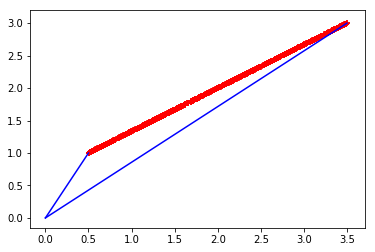

In [17]:
u = array([0.5, 1])
v = array([3.5, 3])
plt.plot([0, u[0]], [0, u[1]], color='b')
plt.plot([0, v[0]], [0, v[1]], color='b')

alphas = np.random.rand(1000)
convex_combos = array([
    alpha*u + (1-alpha)*v
    for alpha in alphas
])
plt.scatter(convex_combos[:, 0], convex_combos[:, 1], color='r', marker='+')


In [32]:
from sklearn.datasets import fetch_lfw_people, fetch_olivetti_faces
# ds = fetch_lfw_people(color=False)
ds = fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/aagnone/scikit_learn_data


In [76]:
def convex_combine(x1, x2, alpha):
    return alpha * x1 + (1 - alpha) * x2

def blend_faces(i, j):
    face_i = ds.images[i]; face_j = ds.images[j]
    data_i = ds.data[i]; data_j = ds.data[j]
    
    # show different convex combinations of the faces
    plt.figure()
    for i, alpha in enumerate(np.linspace(0, 1, 5)):
        plt.subplot(1, 5, i+1)
        plt.title("{:.2f}".format(alpha))
        combined_data = convex_combine(data_i, data_j, alpha)
        combined_img = combined_data.reshape((face_i.shape))
        plt.imshow(combined_img, cmap='gray')

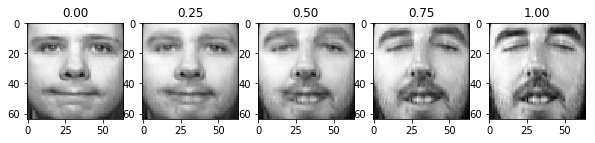

In [114]:
plt.rcParams['figure.figsize'] = [10, 5]
inds = list(np.random.choice(range(len(ds.data)), size=2, replace=False))
blend_faces(*inds)